*This notebook was created by Sergey Tomin (sergey.tomin@xfel.eu). Source and license info is on [GitHub](https://github.com/ocelot-collab/ocelot). January 2018.*

# An Introduction to Ocelot

Ocelot is a multiphysics simulation toolkit designed for studying FEL and storage ring based light sources. Ocelot is written in Python. Its central concept is the writing of python's scripts for simulations with the usage of Ocelot's modules and functions and the standard Python libraries. 

Ocelot includes following main modules:
* **Charged particle beam dynamics module (CPBD)**
    - optics
    - tracking
    - matching
    - collective effects (description can be found [here](http://vrws.de/ipac2017/papers/wepab031.pdf) )
        - Space Charge (3D Laplace solver) 
        - CSR (Coherent Synchrotron Radiation) (1D model with arbitrary number of dipoles).
        - Wakefields (Taylor expansion up to second order for arbitrary geometry).
    - MOGA (Multi Objective Genetics Algorithm) [ref](http://accelconf.web.cern.ch/AccelConf/ipac2016/papers/thpmb034.pdf).
* **Native module for spontaneous radiation calculation**
* **FEL calculations: interface to GENESIS and pre/post-processing**
* **Modules for online beam control and online optimization of accelerator performances.** [ref1](http://accelconf.web.cern.ch/accelconf/IPAC2014/papers/mopro086.pdf), [ref2](https://jacowfs.jlab.org/conf/y15/ipac15/prepress/TUPWA037.PDF), [ref3](http://accelconf.web.cern.ch/AccelConf/ipac2016/papers/wepoy036.pdf), [ref4](https://arxiv.org/pdf/1704.02335.pdf).

Ocelot extensively  uses Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python and give you access to various mathematical and optimization techniques and algorithms. To produce high quality figures Python's [matplotlib](http://matplotlib.org/index.html) library is used.

It is an open source project and it is being developed by physicists from  [The European XFEL](http://www.xfel.eu/), [DESY](http://www.desy.de/) (Germany), [NRC Kurchatov Institute](http://www.nrcki.ru/) (Russia).

We still have no documentation but you can find a lot of examples in /demos/ folder including this tutorial


## Ocelot user profile

Ocelot is designed for researchers who want to have the flexibility that is given by high-level languages such as Matlab, Python (with Numpy and SciPy) or Mathematica.
However if someone needs a GUI  it can be developed using Python's libraries like a [PyQtGraph](http://www.pyqtgraph.org/) or [PyQt](http://pyqt.sourceforge.net/Docs/PyQt4/). 

For example, you can see GUI for SASE optimization (uncomment and run next block)

In [1]:
from IPython.display import Image
#Image(filename='gui_example.png')

## Tutorials
* Preliminaries: Setup & introduction
* Beam dynamics
* [Tutorial N1. Linear optics.](#tutorial1). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/1_introduction.ipynb).
    - Linear optics. Double Bend Achromat (DBA). Simple example of usage OCELOT functions to get periodic solution for a storage ring cell. 
* [Tutorial N2. Tracking.](2_tracking.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/2_tracking.ipynb).
    - Linear optics of the European XFEL Injector. 
    - Tracking. First and second order. 
    - Artificial beam matching - BeamTransform
* [Tutorial N3. Space Charge.](3_space_charge.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/3_space_charge.ipynb).
    - Tracking through RF cavities with SC effects and RF focusing.
* [Tutorial N4. Wakefields.](4_wake.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/4_wake.ipynb).
    - Tracking through corrugated structure (energy chirper) with Wakefields
* [Tutorial N5. CSR.](5_CSR.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/5_CSR.ipynb).
    - Tracking trough bunch compressor with CSR effect.
* [Tutorial N6. RF Coupler Kick.](6_coupler_kick.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/6_coupler_kick.ipynb).
    - Coupler Kick. Example of RF coupler kick influence on trajjectory and optics.
* [Tutorial N7. Lattice design.](7_lattice_design.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/7_lattice_design.ipynb).
    - Lattice design, twiss matching, twiss backtracking 
* [Tutorial N8. Physics process addition. Laser heater](8_laser_heater.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/dev/demos/ipython_tutorials/8_laser_heater.ipynb).
    - Theory of Laser Heater, implementation of new Physics Process, track particles w/o laser heater effect.   

## Preliminaries

The tutorial includes 7 simple examples dedicated to beam dynamics and optics. However, you should have a basic understanding of Computer Programming terminologies. A basic understanding of Python language is a plus.

##### This tutorial requires the following packages:

- Python 3.4-3.6 (python 2.7 can work as well but not guaranteed)
- `numpy` version 1.8 or later: http://www.numpy.org/
- `scipy` version 0.15 or later: http://www.scipy.org/
- `matplotlib` version 1.5 or later: http://matplotlib.org/
- `ipython` version 2.4 or later, with notebook support: http://ipython.org

**Optional** to speed up python 
- numexpr (version 2.6.1)
- pyfftw (version 0.10)
- numba 

The easiest way to get these is to download and install the [Anaconda software distribution](https://www.continuum.io/).

Alternatively, you can download and install [miniconda](http://conda.pydata.org/miniconda.html).
The following command will install all required packages:
```
$ conda install numpy scipy matplotlib jupyter
```

## Ocelot installation
##### Anaconda Cloud
The easiest way to install OCELOT is to use Anaconda cloud. In that case use command:
    ```
    $ conda install -c ocelot-collab ocelot
    ```
##### Explicit installation
Another way is download ocelot from [GitHub](https://github.com/ocelot-collab/ocelot)
1. you have to download from GitHub [zip file](https://github.com/ocelot-collab/ocelot/archive/master.zip).
2. Unzip ocelot-master.zip to your working folder **/your_working_dir/**.
3. Add **../your_working_dir/ocelot-master** to PYTHONPATH
    - **Windows 7:** go to Control Panel -> System and Security -> System -> Advance System Settings -> Environment Variables.
    and in User variables add **/your_working_dir/ocelot-master/** to PYTHONPATH. If variable PYTHONPATH does not exist, create it

    Variable name: PYTHONPATH

    Variable value: ../your_working_dir/ocelot-master/
    - Linux:
    ```
    $ export PYTHONPATH=/your_working_dir/ocelot-master:$PYTHONPATH
    ```
    
#### To launch "ipython notebook" or "jupyter notebook"
in command line run following commands:

```
$ ipython notebook
```

or
```
$ ipython notebook --notebook-dir="path_to_your_directory"
```

or
```
$ jupyter notebook --notebook-dir="path_to_your_directory"
```

### Checking your installation

You can run the following code to check the versions of the packages on your system:

(in IPython notebook, press `shift` and `return` together to execute the contents of a cell)

In [2]:
import IPython
print('IPython:', IPython.__version__)

import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import ocelot
print('ocelot:', ocelot.__version__)

IPython: 6.4.0
numpy: 1.14.3
scipy: 1.1.0
matplotlib: 3.0.0
initializing ocelot...
ocelot: 18.12.0


<a id="tutorial1"></a>
## Tutorial N1. Double Bend Achromat.

We designed a simple lattice to demonstrate the basic concepts and syntax of the optics functions calculation. 
Also, we chose DBA to demonstrate the periodic solution for the optical functions calculation. 

In [3]:
from __future__ import print_function

# the output of plotting commands is displayed inline within frontends, 
# directly below the code cell that produced it
%matplotlib inline

# import from Ocelot main modules and functions
from ocelot import *

# import from Ocelot graphical modules
from ocelot.gui.accelerator import *

## Creating lattice
Ocelot has following elements: Drift, Quadrupole, Sextupole, Octupole, Bend, SBend, RBend, Edge, Multipole, Hcor, Vcor, Solenoid, Cavity, Monitor, Marker, Undulator. 

In [4]:
# defining of the drifts
D1 = Drift(l=2.)
D2 = Drift(l=0.6)
D3 = Drift(l=0.3)
D4 = Drift(l=0.7)
D5 = Drift(l=0.9)
D6 = Drift(l=0.2)

# defining of the quads
Q1 = Quadrupole(l=0.4, k1=-1.3)
Q2 = Quadrupole(l=0.8, k1=1.4)
Q3 = Quadrupole(l=0.4, k1=-1.7)
Q4 = Quadrupole(l=0.5, k1=1.3)

# defining of the bending magnet
B = Bend(l=2.7, k1=-.06, angle=2*pi/16., e1=pi/16., e2=pi/16.)

# defining of the sextupoles
SF = Sextupole(l=0.01, k2=1.5) #random value
SD = Sextupole(l=0.01, k2=-1.5) #random value

# cell creating
cell = (D1, Q1, D2, Q2, D3, Q3, D4, B, D5, SD, D5, SF, D6, Q4, D6, SF, D5, SD, D5, B, D4, Q3, D3, Q2, D2, Q1, D1)

In [5]:
cell

(<ocelot.cpbd.elements.Drift at 0x1c1f9872b0>,
 <ocelot.cpbd.elements.Drift at 0x1c1f9872b0>)

*hint: to see a simple description of the function put cursor inside () and press **Shift-Tab** or you can type sign **?** before function. To extend dialog window press **+** *

The cell is a list of the simple objects which contain a physical information of lattice elements such as length, strength, voltage and so on. In order to create a transport map for every element and bind it with lattice object we have to create new Ocelot object - MagneticLattice() which makes these things automatically. 

MagneticLattice(sequence, start=None, stop=None, method=MethodTM()):     
* sequence - list of the elements,

other parameters we will consider in tutorial N2. 

In [6]:
lat = MagneticLattice(cell)

# to see total lenth of the lattice 
print("length of the cell: ", lat.totalLen, "m")

length of the cell:  20.34 m


### Optical function calculation
Uses: 
* twiss() function and,
* Twiss() object contains twiss parameters and other information at one certain position (s) of lattice

To calculate twiss parameters you have to run **twiss(lattice, tws0=None, nPoints=None)** function. If you want to get a periodic solution leave tws0 by default. 

You can change the number of points over the cell, If nPoints=None, then twiss parameters are calculated at the end of each element.
twiss() function returns list of Twiss() objects.

##### You will see the Twiss object contains more information than just twiss parameters. 

In [7]:
tws = twiss(lat, nPoints=1000)

# to see twiss paraments at the begining of the cell, uncomment next line
# print(tws[0])
print("length = ", len(tws))
# to see twiss paraments at the end of the cell, uncomment next line
print(tws[998] == tws[-1])

length =  1000
False


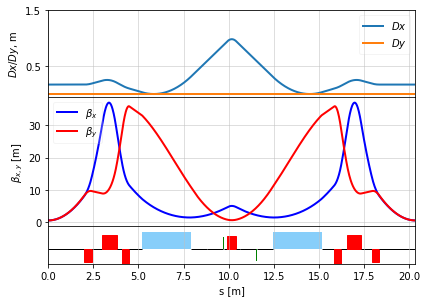

In [8]:
# plot optical functions.
plot_opt_func(lat, tws, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

# you also can use standard matplotlib functions for plotting
#s = [tw.s for tw in tws]
#bx = [tw.beta_x for tw in tws]
#plt.plot(s, bx)
#plt.show()

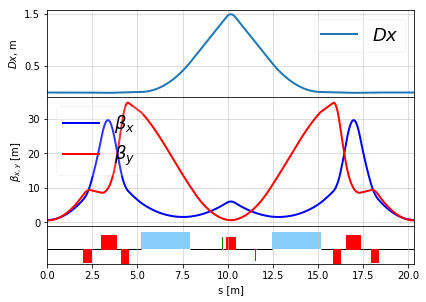

In [9]:
# you can play with quadrupole strength and try to make achromat
Q4.k1 = 1.18

# to make achromat uncomment next line
# Q4.k1 =  1.18543769836
# To use matching function, please see ocelot/demos/ebeam/dba.py 

# updating transfer maps after changing element parameters. 
lat.update_transfer_maps()

# recalculate twiss parameters 
tws=twiss(lat, nPoints=1000)

plot_opt_func(lat, tws, legend=False)
plt.show()